# 01. Image Preprocessing - PART 01 - RESIZING ORIGINALS

### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Mode of running

In [2]:
TEST_MODE = False

### Paths

In [3]:
BASE_PATH = './data'
ORIGINAL_IMAGES = f'{BASE_PATH}/unsplit'

In [4]:
CATEGORIES = os.listdir(ORIGINAL_IMAGES) # list the names of the categories that in my data
print(str(len(CATEGORIES)),'CATEGORIES are ', CATEGORIES)

8 CATEGORIES are  ['Black_Hooded_Oriole', 'Common_Myna', 'Indian_Peafowl', 'Intermediate_Egret', 'Other', 'Red_Faced_Malkoha', 'Rose_Ringed_Parakeet', 'White_Throated_Kingfisher']


### Preparing the initial dataset

In [5]:
def read_images():
    dataset = []
    
    for category in CATEGORIES:
        cat_path = os.path.join(ORIGINAL_IMAGES, category)
        cat_num = CATEGORIES.index(category)
        for img_filename in os.listdir(cat_path):
            img = cv2.imread(os.path.join(cat_path, img_filename))[...,::-1]  # read & convert from BGR to RGB
            dataset.append([img, cat_num])
        if TEST_MODE and cat_num == 1:
            break # - then will only take the images from the first and second categories
            
    return dataset

In [6]:
dataset = read_images()
len(dataset)

896

### Calculating the optimum size for image resizing

In [7]:
sizes = np.zeros((len(dataset),2))
for _idx, _data in enumerate(dataset):
    sizes[_idx, :] = _data[0].shape[0], _data[0].shape[1]

In [8]:
avg_dims = sizes.mean(axis=0)
avg_dims

array([569.00892857, 735.921875  ])

In [9]:
cat_avg_dims = np.zeros((len(CATEGORIES), 2))

for cat_num in range(len(CATEGORIES)):
    _data_in_cat = [data for data in dataset if data[1] == cat_num]
    _sizes = np.zeros((len(_data_in_cat), 2))
    for _idx, _data in enumerate(_data_in_cat):
        _sizes[_idx, :] = _data[0].shape[0], _data[0].shape[1]
    cat_avg_dims[cat_num] = _sizes.mean(axis=0)
    
cat_avg_dims

array([[ 804.73333333, 1003.78333333],
       [ 796.85      , 1044.53333333],
       [ 817.2       , 1099.88333333],
       [ 783.31707317, 1111.24390244],
       [ 365.94234592,  469.07753479],
       [ 877.48333333, 1054.8       ],
       [ 869.13333333, 1148.93333333],
       [ 840.82692308, 1091.59615385]])

In [10]:
opt_dims = np.ceil(avg_dims/100.0)*100    # ceiling to the nearest hundred
opt_dims

array([600., 800.])

In [11]:
opt_dims = [320, 400]

### Resizing images to `opt_dims`

In [12]:
dataset[0][0].shape

(859, 1200, 3)

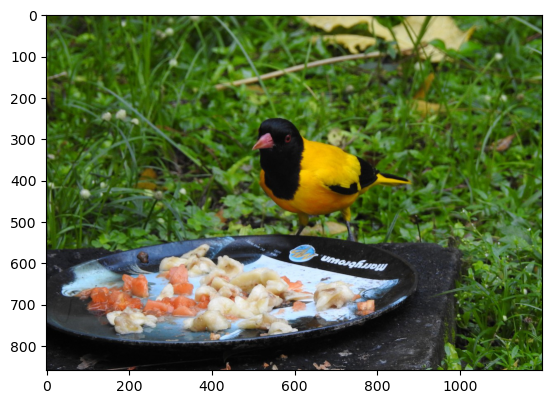

In [13]:
plt.imshow(dataset[0][0][:,:])

In [14]:
opt_dims

[320, 400]

In [15]:
# dataset[0][0] = cv2.resize(dataset[0][0], (int(opt_dims[1]), int(opt_dims[0])))
# plt.imshow(dataset[0][0])

In [16]:
# dataset[0][0].shape

In [22]:
def resize_images():
    dataset = []
    
    for category in CATEGORIES:
        cat_path = os.path.join(ORIGINAL_IMAGES, category)
        cat_num = CATEGORIES.index(category)
        print(f'Resizing in category: {cat_num} - {category}')
        for img_filename in os.listdir(cat_path):
            img = cv2.imread(os.path.join(cat_path, img_filename))[...,::-1]  # read & convert from BGR to RGB
            resized_img = cv2.resize(img, (int(opt_dims[1]), int(opt_dims[0])))
            cv2.imwrite(os.path.join(cat_path, img_filename), cv2.cvtColor(resized_img, cv2.COLOR_RGB2BGR))
        if TEST_MODE and cat_num == 1:
            break # - then will only take the images from the first and second categories

In [23]:
resize_images()

Resizing in category: 0 - Black_Hooded_Oriole
Resizing in category: 1 - Common_Myna
Resizing in category: 2 - Indian_Peafowl
Resizing in category: 3 - Intermediate_Egret
Resizing in category: 4 - Other
Resizing in category: 5 - Red_Faced_Malkoha
Resizing in category: 6 - Rose_Ringed_Parakeet
Resizing in category: 7 - White_Throated_Kingfisher
